In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [ ]:
# firework_complaint ~ population, median_income, race, age, ..., shooting_incident? air_quality?

In [3]:
%%R
# read fireworks-14to24.csv as df
df <- read_csv('fireworks-14to24.csv', show_col_types = FALSE)

In [10]:
%%R
# hypothesis test 1: t-test
# question: compare 2022 and 2023 firework complaints in each zipcode
# H0: there is no significant difference
# H1: there is significant difference

# filter year=2022, groupby zipcode, count complaints, filter n>0
df_2022 <- df %>% 
filter(year(Created.Date)==2022) %>% 
group_by(Incident.Zip) %>%
summarise(n = n())%>%
filter(Incident.Zip>0)

df_2023 <- df %>% 
filter(year(Created.Date)==2023) %>% 
group_by(Incident.Zip) %>%
summarise(n = n())%>%
filter(Incident.Zip>0)

t.test(df_2022$n, df_2023$n)


	Welch Two Sample t-test

data:  df_2022$n and df_2023$n
t = -0.68628, df = 344.11, p-value = 0.493
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.952871   6.734611
sample estimates:
mean of x mean of y 
 51.49432  55.10345 



In [13]:
%%R
# df_year = merge df_2022 and df_2023
df_year <- merge(df_2022, df_2023, by = "Incident.Zip", all = TRUE)
# chage NA value to 0
df_year[is.na(df_year)] <- 0
# rename columns as zipcode, 2022, 2023
colnames(df_year) <- c("zipcode", "2022", "2023")
df_year

    zipcode 2022 2023


1     10000    4    0
2     10001    4   13
3     10002  110  116
4     10003   10    5
5     10004    0    4
6     10005    2    1
7     10009   49   36
8     10010    5    3
9     10011   12   16
10    10012   21    7
11    10013    3    5
12    10014    2    9
13    10016   23    5
14    10017    2    0
15    10018    3    2
16    10019    7   10
17    10021    4    3
18    10022    3    1
19    10023   11    9
20    10024   10   11
21    10025   38   37
22    10026   63   24
23    10027   72   58
24    10028    2    0
25    10029  202  121
26    10030   14   24
27    10031  136  212
28    10032  280  211
29    10033  160   45
30    10034  162  231
31    10035   68   60
32    10036    4   11
33    10037   26   37
34    10038   40   28
35    10039   28   30
36    10040  206  217
37    10044    0    2
38    10065    0    2
39    10069    1    0
40    10075    3    1
41    10128   20   24
42    10280    2    0
43    10301   50   37
44    10302   42   37
45    10303   20   26
46    103

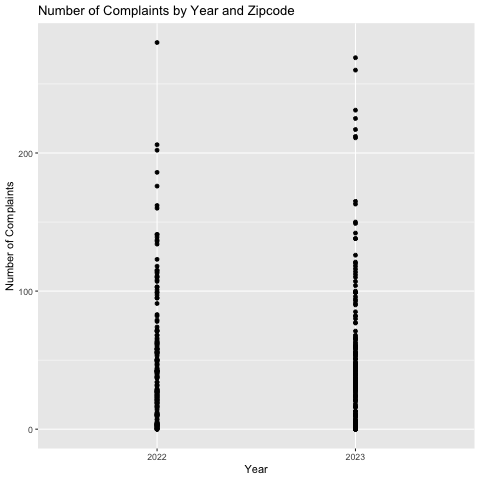

In [16]:
%%R
df_year_long <- df_year %>%
  gather(key = "year", value = "value", -zipcode)
ggplot(df_year_long, aes(x = year, y = value)) +
  geom_point() +
  labs(title = "Number of Complaints by Year and Zipcode",
       x = "Year",
       y = "Number of Complaints")

In [17]:
%%R
df_year_long %>% head(4)

  zipcode year value
1   10000 2022     4
2   10001 2022     4
3   10002 2022   110
4   10003 2022    10


In [18]:
%%R
t.test(value ~ year, data = df_year_long) 


	Welch Two Sample t-test

data:  value by year
t = -0.55985, df = 356.82, p-value = 0.5759
alternative hypothesis: true difference in means between group 2022 and group 2023 is not equal to 0
95 percent confidence interval:
 -13.08962   7.28851
sample estimates:
mean in group 2022 mean in group 2023 
          50.07182           52.97238 



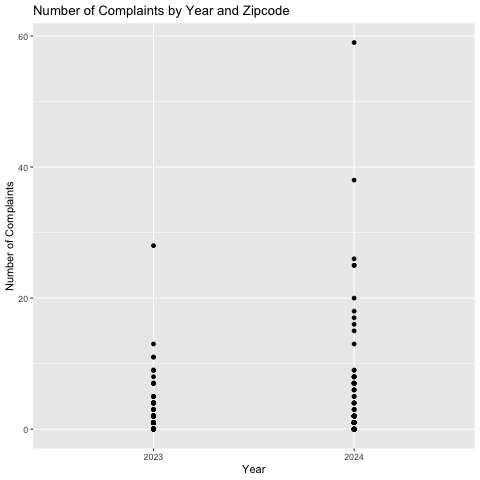

In [20]:
%%R
# filter year(Created.Date)==2023 and month(Created.Date)==1 or 2, groupby zipcode, count complaints, filter n>0, change NA to 0
df_2023_jan_feb <- df %>%
filter(year(Created.Date)==2023 & (month(Created.Date)==1 | month(Created.Date)==2)) %>%
group_by(Incident.Zip) %>%
summarise(n = n()) %>%
filter(Incident.Zip>0)

df_2024_jan_feb <- df %>%
filter(year(Created.Date)==2024 & (month(Created.Date)==1 | month(Created.Date)==2)) %>%
group_by(Incident.Zip) %>%
summarise(n = n()) %>%
filter(Incident.Zip>0)

df_jan_feb <- merge(df_2023_jan_feb, df_2024_jan_feb, by = "Incident.Zip", all = TRUE)
df_jan_feb[is.na(df_jan_feb)] <- 0
# rename columns as zipcode, 2022, 2023
colnames(df_jan_feb) <- c("zipcode", "2023", "2024")

df_jan_feb_long <- df_jan_feb %>%
  gather(key = "year", value = "value", -zipcode)
ggplot(df_jan_feb_long, aes(x = year, y = value)) +
  geom_point() +
  labs(title = "Number of Complaints by Year and Zipcode",
       x = "Year",
       y = "Number of Complaints")


In [21]:
%%R
t.test(value ~ year, data = df_jan_feb_long) 


	Welch Two Sample t-test

data:  value by year
t = -2.357, df = 176.22, p-value = 0.01952
alternative hypothesis: true difference in means between group 2023 and group 2024 is not equal to 0
95 percent confidence interval:
 -3.2330834 -0.2862964
sample estimates:
mean in group 2023 mean in group 2024 
           2.24031            4.00000 



In [22]:
%%R
# column names of df
colnames(df)

 [1] "Unique.Key"                     "Created.Date"                  
 [3] "Closed.Date"                    "Agency"                        
 [5] "Agency.Name"                    "Complaint.Type"                
 [7] "Descriptor"                     "Location.Type"                 
 [9] "Incident.Zip"                   "Incident.Address"              
[11] "Street.Name"                    "Cross.Street.1"                
[13] "Cross.Street.2"                 "Intersection.Street.1"         
[15] "Intersection.Street.2"          "Address.Type"                  
[17] "City"                           "Landmark"                      
[19] "Facility.Type"                  "Status"                        
[21] "Due.Date"                       "Resolution.Action.Updated.Date"
[23] "Community.Board"                "Borough"                       
[25] "X.Coordinate..State.Plane."     "Y.Coordinate..State.Plane."    
[27] "Park.Facility.Name"             "Park.Borough"                  
[29] "

In [37]:
%%R
df_chi_square <- df %>%
filter(year(Created.Date)==2023) %>%
# only save columns: Unique.Key, Location.Type, Borough
select(Unique.Key, Location.Type, Borough) %>%
# create a pivot table, column=Location.Type, row=Borough, value=count
group_by(Location.Type, Borough) %>%
summarise(count = n()) %>%
spread(key = Location.Type, value = count)%>%
# change NA to 0
replace(is.na(.), 0)%>%
# delete row with Borough=Unspecified
filter(Borough!="Unspecified")%>%
# switch row and column, delete the first row
t()%>%
as.data.frame()%>%
# change column names
setNames(.[1,])%>%
# delete the second row
.[2:nrow(.),]


`summarise()` has grouped output by 'Location.Type'. You can override using the
`.groups` argument.
                           BRONX BROOKLYN MANHATTAN QUEENS STATEN ISLAND
Bridge                         3        0         1      1             0
Highway                        2        2         1      8             0
Park/Playground               92      220       132    295            53
Pier                           0       19        14      9             3
Residential Building/House   296      758       296    799           328
Store/Commercial              11       42        18     67             2
Street/Sidewalk              941     1717      1173   1760           543


In [42]:
%%R
data <- matrix(c(3, 0, 1, 1, 0,
                 2, 2, 1, 8, 0,
                 92, 220, 132, 295, 53,
                 0, 19, 14, 9, 3,
                 296, 758, 296, 799, 328,
                 11, 42, 18, 67, 2,
                 941, 1717, 1173, 1760, 543), 
               nrow = 7, 
               byrow = TRUE,
               dimnames = list(c("Bridge", "Highway", "Park/Playground", "Pier", "Residential Building/House", "Store/Commercial", "Street/Sidewalk"),
                               c("BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND")))

data

                           BRONX BROOKLYN MANHATTAN QUEENS STATEN ISLAND
Bridge                         3        0         1      1             0
Highway                        2        2         1      8

             0
Park/Playground               92      220       132    295            53
Pier                           0       19        14      9             3
Residential Building/House   296      758       296    799           328
Store/Commercial              11       42        18     67             2
Street/Sidewalk              941     1717      1173   1760           543


In [43]:
%%R
chisq.test(data)


	Pearson's Chi-squared test

data:  data
X-squared = 203.21, df = 24, p-value < 2.2e-16



In addition: Warning message:
In chisq.test(data) : Chi-squared approximation may be incorrect
